# <span style="color:darkblue"> QTM 151 - Quiz 5 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [2]:
# Write your answer here

print("Serena Zhou")


Serena Zhou


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [1]:
# Write your answer here:

print("I will abide by Emory's code of conduct")


I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [6]:
# Write your answer here

import matplotlib.pyplot as plt
import pandas as pd


<font size = "5">

In this quiz you will work with exchange rate data on bitcoin, <br>
for two exchange platforms:

- 1 coin base bit coin (CB) to dollar (USD)
- 1 ethereum bit coin (ET) to dollar (USD).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "bitcoin.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 21.


In [22]:
# Write your own code

bitcoin = pd.read_csv("data_raw/bitcoin.csv")
bitcoin

bitcoin["date"] = pd.to_datetime(bitcoin["date_string"],format = "%Y %b %d, %A")

bitcoin

,date_string,cb_to_usd,et_to_usd,date
0,"2016 May 18, Wednesday",455.56,13.18,2016-05-18
1,"2016 May 19, Thursday",438.38,14.90,2016-05-19
2,"2016 May 20, Friday",445.65,14.17,2016-05-20
3,"2016 May 21, Saturday",446.28,NaN,2016-05-21
4,"2016 May 22, Sunday",442.48,NaN,2016-05-22
...,...,...,...,...
2513,"2023 Apr 05, Wednesday",28187.68,1910.39,2023-04-05
2514,"2023 Apr 06, Thursday",28053.47,1873.51,2023-04-06
2515,"2023 Apr 07, Friday",27927.15,1864.71,2023-04-07
2516,"2023 Apr 08, Saturday",27959.50,1850.01,2023-04-08


In [13]:
bitcoin

,date_string,cb_to_usd,et_to_usd
0,"2016 May 18, Wednesday",455.56,13.18
1,"2016 May 19, Thursday",438.38,14.90
2,"2016 May 20, Friday",445.65,14.17
3,"2016 May 21, Saturday",446.28,NaN
4,"2016 May 22, Sunday",442.48,NaN
...,...,...,...
2513,"2023 Apr 05, Wednesday",28187.68,1910.39
2514,"2023 Apr 06, Thursday",28053.47,1873.51
2515,"2023 Apr 07, Friday",27927.15,1864.71
2516,"2023 Apr 08, Saturday",27959.50,1850.01


<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "cb_to_usd" and "et_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 CoinBase bitcoin to USD" <br>
and "1 Ethereum bitcoin to USD"

Hint: See Lecture 22 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```

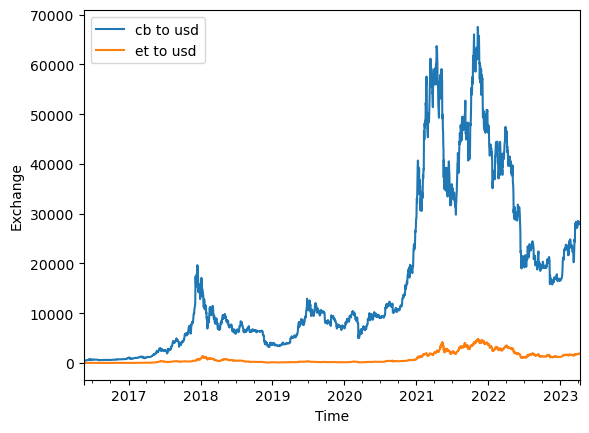

In [23]:
# Write your own code

bitcoin[["date","cb_to_usd","et_to_usd"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Exchange")
plt.legend(["cb to usd", "et to usd"])



<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_cb" which computes the percentage daily <br>
growth rate of "cb_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)``` as in Lecture 22

In [29]:
# Write your own code

bitcoin["diff_cb_to_usd"] = bitcoin["cb_to_usd"].diff()
bitcoin["lag_cb_to_usd"] = bitcoin["cb_to_usd"].shift(1)
bitcoin["growth_cb"] = bitcoin["diff_cb_to_usd"]* 100/bitcoin["lag_cb_to_usd"]

bitcoin

,date_string,cb_to_usd,et_to_usd,date,diff_cb_to_usd,lag_date,lag_cb_to_usd,growth_cb
0,"2016 May 18, Wednesday",455.56,13.18,2016-05-18,NaN,NaT,NaN,NaN
1,"2016 May 19, Thursday",438.38,14.90,2016-05-19,-17.18,1 days,455.56,-3.771183
2,"2016 May 20, Friday",445.65,14.17,2016-05-20,7.27,1 days,438.38,1.658379
3,"2016 May 21, Saturday",446.28,NaN,2016-05-21,0.63,1 days,445.65,0.141367
4,"2016 May 22, Sunday",442.48,NaN,2016-05-22,-3.80,1 days,446.28,-0.851483
...,...,...,...,...,...,...,...,...
2513,"2023 Apr 05, Wednesday",28187.68,1910.39,2023-04-05,15.66,1 days,28172.02,0.055587
2514,"2023 Apr 06, Thursday",28053.47,1873.51,2023-04-06,-134.21,1 days,28187.68,-0.476130
2515,"2023 Apr 07, Friday",27927.15,1864.71,2023-04-07,-126.32,1 days,28053.47,-0.450283
2516,"2023 Apr 08, Saturday",27959.50,1850.01,2023-04-08,32.35,1 days,27927.15,0.115837


<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_cb" had a value greater than 15 or less than -15
- Generate a line plot with the "growth_cb" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 22 to create a shaded region <br>
for time periods where "bool_cond" is true.



In [33]:
# Write your own code

#d
# subset
subset_greater  = bitcoin.query('growth_cb >= 15')
subset_less   = bitcoin.query('grwoth_cb <= -15')
bitcoin["bool_period"] = bitcoin.query('growth_cb >= 15') | bitcoin.query('grwoth_cb <= -15')

vec_y = bitcoin["growth_cb"]
plt.fill_between(x= bitcoin["date"],
                  y1 = vec_y.min(),
                  y2 = vec_y.max(),
                  where = bitcoin["bool_period"],
                  alpha = 0.2,color = "red")

plt.show()


UndefinedVariableError: name 'grwoth_cb' is not defined

<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the date column and freq to "m" (month)
- Follow the instructions in Lecture 21 to compute an aggregate dataset <br>
by month which computes the standard deviation of "cb_to_usd"
- Display the dataset




In [30]:
# Write your own code

month_config = pd.Grouper(key = "date",freq = "m")

monthly_data = bitcoin.groupby(month_config).agg(std_monthly = ("cb_to_usd","std")).reset_index()

display(monthly_data)

,date,std_monthly
0,2016-05-31,37.522931
1,2016-06-30,67.727627
2,2016-07-31,13.843294
3,2016-08-31,11.616248
4,2016-09-30,10.997678
...,...,...
79,2022-12-31,317.869463
80,2023-01-31,2655.277513
81,2023-02-28,947.762915
82,2023-03-31,2826.126499


<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["cb_to_usd","et_to_usd"]
```

- Display the dataset

Hint: See Lecture 22 for details on ```pd.melt()```

In [31]:
# Write your own code

bitcoin_long = pd.melt(bitcoin,
                         var_name   = "type",
                         value_name = "exchange_rate",
                         id_vars='date',
                         value_vars=["cb_to_usd", "et_to_usd"])

display(bitcoin_long)


,date,type,exchange_rate
0,2016-05-18,cb_to_usd,455.56
1,2016-05-19,cb_to_usd,438.38
2,2016-05-20,cb_to_usd,445.65
3,2016-05-21,cb_to_usd,446.28
4,2016-05-22,cb_to_usd,442.48
...,...,...,...
5031,2023-04-05,et_to_usd,1910.39
5032,2023-04-06,et_to_usd,1873.51
5033,2023-04-07,et_to_usd,1864.71
5034,2023-04-08,et_to_usd,1850.01
